# Benchmark our library

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%cd drive/My\ Drive/textaug

/content/drive/My Drive/textaug


## Dependencies

In [0]:
# !git clone https://github.com/facebookresearch/fastText.git
# %cd fastText
# %ls
# !sudo pip install .
# %cd ..
!pip install fasttext

In [0]:
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ru.300.bin.gz
# !gunzip cc.ru.300.bin.gz

--2020-02-01 02:25:21--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ru.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4496459151 (4.2G) [application/octet-stream]
Saving to: ‘cc.ru.300.bin.gz’

cc.ru.300.bin.gz    100%[===================>]   4.19G  29.9MB/s    in 2m 30s  

2020-02-01 02:27:52 (28.6 MB/s) - ‘cc.ru.300.bin.gz’ saved [4496459151/4496459151]



## Modules

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
# import fasttext
# import fasttext.util

In [0]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
from assistants.data_preparation import DataPreparation
from assistants.embeddings import Embeddings
from assistants.classifiers import Classifiers, Metrics

In [0]:
data = DataPreparation.tweets('data')
#readability('data', 'Tags classifier')

Dublicates removed: 9394 from 226834


In [0]:
data[2].nunique() #классов в трэйне

2

In [0]:
embed = Embeddings(*data)

In [0]:
data_encoded = embed.tf_idf_vectorizer()

In [0]:
# data_encoded = embed.fasttext_vectorizer()
# embed.fasttext_model_clear_from_ram()

In [82]:
y_pred, y_test, _ = Classifiers.random_forest(*data_encoded)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 10000 out of 

Mean: 0.600 +/- 0.004 (95% conf.)


In [0]:
clf = _

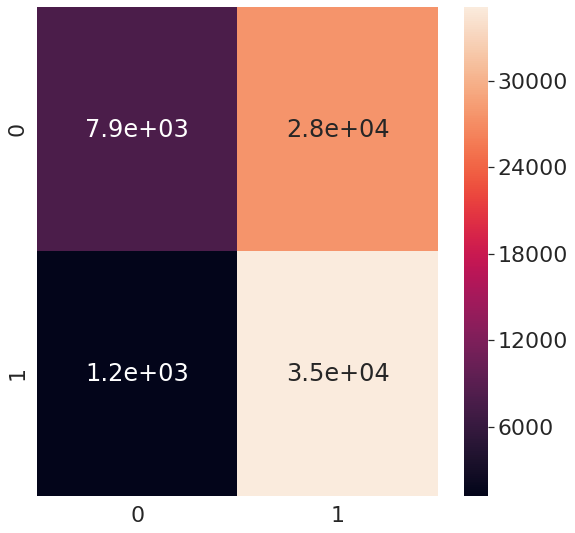

In [83]:
Metrics.confusion_matrix(y_pred, y_test);